In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv (
    './content/drive/MyDrive/Code /Sentiment Analysis/noemoticon.csv', 
    header=None,
    encoding='latin-1'
)
df.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [3]:
df = df.drop([1, 2, 3, 4], axis=1)
df.columns = ['Sentiment', 'Sentence']
df.head(5)

,Sentiment,Sentence
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.shape

(1600000, 2)

In [5]:
# Class Distribution:

counts = df['Sentiment'].value_counts()
print(counts)
print(f'\nNegative: {counts.iloc[0]}\nPositive: {counts.iloc[1]}')

0    800000
4    800000
Name: Sentiment, dtype: int64

Negative: 800000
Positive: 800000


In [6]:
df['Sentiment'] = df['Sentiment'].map({np.int64(0): 0, np.int64(4): 1})
df['Sentiment'].tail(5)

1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: Sentiment, dtype: int64

In [7]:
import random

'''
    Printing a random sentence from the dataset along with its sentiment. 
    (Run the cell again, to generate new sentence each time)
'''

sentiments = {0: 'Negative', 1: 'Positive'}
random_sentence_idx = random.randint(0, df.shape[0])
random_sentence = df.iloc[random_sentence_idx, 1]
sentence_sentiment = sentiments[df.iloc[random_sentence_idx, 0]]

print(f'Sentence: {random_sentence}')
print(f'Sentiment: {sentence_sentiment}')

Sentence: @zapakitul and we'll show you a good night in Gothenburg too 
Sentiment: Neutral


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print('ALL STOPWORDS:\n')
print(stopwords)

ALL STOPWORDS:

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',

In [10]:
import string

def pre_process_text(text):
    # Converting the text to lowercase first
    text = text.lower()
    # Removing stopwords
    words = text.split(' ')
    words = [word for word in words if word not in stopwords]
    text = " ".join(words)
    # Removing punctuation
    return "".join(char for char in text if char not in string.punctuation)

# Testing our preprocessing function 
print(pre_process_text("I hadn't thought about this this. This is indeed a remarkable contribution....."))
print(pre_process_text(random_sentence))

thought this indeed remarkable contribution
zapakitul well show good night gothenburg 


In [11]:
# Let us apply our preprocessing function to all of the sentences in our dataset
df['Sentence'] = df['Sentence'].apply(pre_process_text)

In [12]:
df['Sentence'].head(5)

0    switchfoot httptwitpiccom2y1zl  awww thats bum...
1    upset cant update facebook texting it might cr...
2    kenichan dived many times ball managed save 50...
3                    whole body feels itchy like fire 
4    nationwideclass no behaving all im mad here ca...
Name: Sentence, dtype: object

In [13]:
# Seperate sentiments from sentences
X = df['Sentence']
y = df['Sentiment'].values

In [14]:
# Splitting the dataset into training and testing 70% and 20% respectively.
from sklearn.model_selection import train_test_split
rand_seed = 42 # To ensure the reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=rand_seed)

In [15]:
print(f'Training Samples: {len(X_train)}')
print(f'Test Samples: {len(X_test)}')

Training Samples: 1120000
Test Samples: 480000


In [16]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras import layers

max_length = 140
max_features = 10000

In [ ]:
text_vectorization = layers.TextVectorization(
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=max_length,
)
text_vectorization.adapt(X)

X_train = text_vectorization(X_train)
X_test = text_vectorization(X_test)

In [ ]:
import pickle

vocabulary = text_vectorization.get_vocabulary()

with open('/content/drive/MyDrive/Code /Sentiment Analysis/vocab.pickle', 'wb') as file:
    pickle.dump(vocabulary, file)

with open('/content/drive/MyDrive/Code /Sentiment Analysis/X_train.pickle', 'wb') as file:
    pickle.dump(X_train, file)

with open('/content/drive/MyDrive/Code /Sentiment Analysis/X_test.pickle', 'wb') as file:
    pickle.dump(X_test, file)

In [17]:
import pickle
with open('/content/drive/MyDrive/Code /Sentiment Analysis/X_train.pickle', 'rb') as file:
  X_train = pickle.load(file)

with open('/content/drive/MyDrive/Code /Sentiment Analysis/X_test.pickle', 'rb') as file:
  X_test = pickle.load(file)

with open('/content/drive/MyDrive/Code /Sentiment Analysis/vocab.pickle', 'rb') as file:
  vocabulary = pickle.load(file)

# **Experiment no. 1 Using RNN with Embedding Layer**

In [ ]:
import keras
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(max_features, max_length)(inputs)
x = layers.SimpleRNN(32)(embedded)
outputs = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

# I had to train it for 5 epochs due to time and device constraints.
# Each epoch was taking considerably huge amount of time.

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=300,
                    validation_split=0.2)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 140)         1400000   
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                5536      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,409,761
Trainable params: 1,409,761
Non-tra

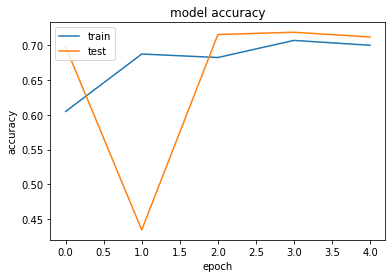

In [ ]:
# When the model was trained on 10 epochs, more often than not, the accuracy started to plummet
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
results = []
_, acc = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

15000/15000 [==============================] - 148s 10ms/step
Test Accuracy: 0.7109354138374329, Precision: 0.674040917638727, Recall: 0.8169291666666667, F1-Score: 0.7386381402848494


In [ ]:
with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

# **Experiment no. 2 adding an additional layer of 128 neurons**

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(max_features, max_length)(inputs)
x = layers.SimpleRNN(32)(embedded)
outputs = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_4 (Embedding)     (None, None, 140)         1400000   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                5536      
                                                                 
 dense_12 (Dense)            (None, 128)               4224      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33  

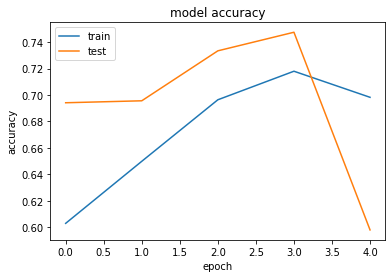

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
_, acc = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]

15000/15000 [==============================] - 150s 10ms/step


In [ ]:
import sklearn
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')
results.append([acc, precision, recall, f1])

Test Accuracy: 0.5975375175476074, Precision: 0.5649780713928829, Recall: 0.8480791666666667, F1-Score: 0.6781694599007096


In [ ]:
with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

# **Experiment no. 3 Using RNN with Pretrained word embedding GloVe**

In [ ]:
path_to_glove_file = "/content/drive/MyDrive/Code /Sentiment Analysis/glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


In [ ]:
import keras
embedding_dim = 100
word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.SimpleRNN(32)(embedded)
outputs = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 100)         1000000   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,008,481
Trainable params: 8,481
Non-trainab

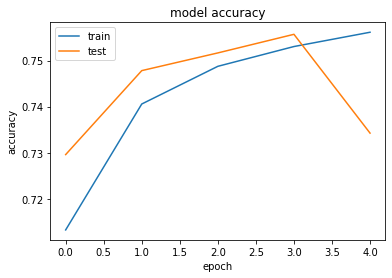

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import sklearn

y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

15000/15000 [==============================] - 228s 15ms/step
Test Accuracy: 0.73515, Precision: 0.8088119418665732, Recall: 0.6158833333333333, F1-Score: 0.6992846870032549


In [ ]:
with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

# **Experiment no. 4 Using RNN with Pretrained word embedding GloVe (Additional layer)**

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.SimpleRNN(32)(embedded)
outputs = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 100)         1000000   
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_16 (Dense)            (None, 128)               4224      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33  

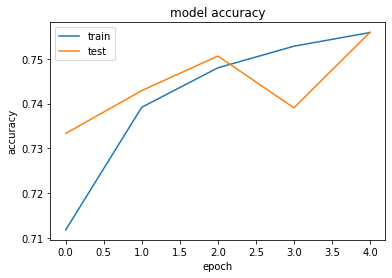

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

15000/15000 [==============================] - 226s 15ms/step
Test Accuracy: 0.7564770833333333, Precision: 0.7660654157535519, Recall: 0.7384583333333333, F1-Score: 0.7520085880797962


# **Experiment no. 5 Using RNN with Pretrained word embedding GloVe-Twitter**

In [ ]:
path_to_glove_twitter_file = "/content/drive/MyDrive/Code /Sentiment Analysis/glove.twitter.27B.100d.txt"

embeddings_index = {}
with open(path_to_glove_twitter_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

embedding_dim = 100
word_index = dict(zip(vocabulary, range(len(vocabulary))))
embedding_matrix = np.zeros((max_features, embedding_dim))

for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

Found 1193514 word vectors.


In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.SimpleRNN(32)(embedded)
outputs = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_4 (Embedding)     (None, None, 100)         1000000   
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_20 (Dense)            (None, 64)                2112      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,008,481
Trainable params: 8,481
Non-trainab

In [ ]:
y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

15000/15000 [==============================] - 219s 15ms/step
Test Accuracy: 0.7721270833333334, Precision: 0.7787604198233805, Recall: 0.7602291666666666, F1-Score: 0.7693832241523627


# **Experiment no. 6 Using RNN with Pretrained word embedding GloVe-Twitter (Additional Layer)**

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.SimpleRNN(32)(embedded)
outputs = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_4 (Embedding)     (None, None, 100)         1000000   
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_23 (Dense)            (None, 128)               4224      
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 1)                 33  

In [ ]:
y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

15000/15000 [==============================] - 218s 15ms/step
Test Accuracy: 0.7707729166666667, Precision: 0.7829306839307405, Recall: 0.7492875, F1-Score: 0.7657397373144242


# **Experiment no. 7 Using RNN with Pretrained word embedding FastText**

In [ ]:
import io

embeddings_index = {}
fname = '/content/drive/MyDrive/Code /Sentiment Analysis/wiki-news-300d-1M.vec'

# Reading the vec file and extracting words along with their 300d vectors
fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
x = fin.readline().split()
all = []
i = 0

while x:
  if i == 0: 
    i = -1
    continue
  
  line = ' '.join(x)
  word, coefs = line.split(maxsplit=1)
  coefs = np.fromstring(coefs, "f", sep=" ")
  embeddings_index[word] = coefs
  x = fin.readline().split()

print(f"Found {len(embeddings_index)} word vectors.")

Found 999995 word vectors.


In [ ]:
import keras
embedding_dim = 300
word_index = dict(zip(vocabulary, range(len(vocabulary))))
embedding_matrix = np.zeros((max_features, embedding_dim))

for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.SimpleRNN(32)(embedded)
outputs = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]

In [ ]:
import sklearn
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

Test Accuracy: 0.7716, Precision: 0.7800096223237912, Recall: 0.7565833333333334, F1-Score: 0.7681179038562412


# **Experiment no. 8 Using RNN with Pretrained word embedding FastText (Additional Layer)**

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.SimpleRNN(32)(embedded)
outputs = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 300)         3000000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                10656     
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33  

# **Experiment no. 9 Using LSTM with Embedding Layer**

In [ ]:
import keras
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(max_features, max_length)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
outputs = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=300,
                    validation_split=0.2)

y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_5 (Embedding)     (None, None, 140)         1400000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               44288     
 l)                                                              
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                           

# **Experiment no. 10 Using LSTM with Embedding Layer (Additional Layer)**

In [ ]:
import keras
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(max_features, max_length)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
outputs = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=300,
                    validation_split=0.2)

y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_6 (Embedding)     (None, None, 140)         1400000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               44288     
 nal)                                                            
                                                                 
 dense_30 (Dense)            (None, 128)               8320      
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                           

# **Experiment no. 11 Using LSTM with Pretrained word embedding GloVe**

In [ ]:
path_to_glove_file = "/content/drive/MyDrive/Code /Sentiment Analysis/glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

embedding_dim = 100
word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
outputs = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

Found 400000 word vectors.
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_7 (Embedding)     (None, None, 100)         1000000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                               

# **Experiment no. 12 Using LSTM with Pretrained word embedding GloVe (Additional Layer)**

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
outputs = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_7 (Embedding)     (None, None, 100)         1000000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dense_37 (Dense)            (None, 128)               8320      
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                          

# **Experiment no. 13 Using LSTM with Pretrained word embedding GloVe-Twitter**

In [ ]:
path_to_glove_file = "/content/drive/MyDrive/Code /Sentiment Analysis/glove.twitter.27B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

import keras
embedding_dim = 100
word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
outputs = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

Found 1193514 word vectors.
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_8 (Embedding)     (None, None, 100)         1000000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                              

# **Experiment no. 14 Using LSTM with Pretrained word embedding GloVe-Twitter (Additional Layer)**

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
outputs = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_8 (Embedding)     (None, None, 100)         1000000   
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dense_44 (Dense)            (None, 128)               8320      
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                          

# **Experiment no. 15 Using LSTM with Pretrained word embedding FastText**

In [ ]:
import io

embeddings_index = {}
fname = '/content/drive/MyDrive/Code /Sentiment Analysis/wiki-news-300d-1M.vec'

# Reading the vec file and extracting words along with their 300d vectors
fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
x = fin.readline().split()
all = []
i = 0

while x:
  if i == 0: 
    i = -1
    continue
  
  line = ' '.join(x)
  word, coefs = line.split(maxsplit=1)
  coefs = np.fromstring(coefs, "f", sep=" ")
  embeddings_index[word] = coefs
  x = fin.readline().split()

print(f"Found {len(embeddings_index)} word vectors.")

import keras
embedding_dim = 300
word_index = dict(zip(vocabulary, range(len(vocabulary))))
embedding_matrix = np.zeros((max_features, embedding_dim))

for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
outputs = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]


import sklearn
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

Found 999995 word vectors.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 300)         3000000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               85248     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                  

# **Experiment no. 16 Using LSTM with Pretrained word embedding FastText (Additional Layer)**

In [49]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras import layers
import keras
import io
import numpy as np

embeddings_index = {}
fname = '/content/drive/MyDrive/Code /Sentiment Analysis/wiki-news-300d-1M.vec'

# Reading the vec file and extracting words along with their 300d vectors
fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
x = fin.readline().split()
all = []
i = 0

while x:
  if i == 0: 
    i = -1
    continue
  
  line = ' '.join(x)
  word, coefs = line.split(maxsplit=1)
  coefs = np.fromstring(coefs, "f", sep=" ")
  embeddings_index[word] = coefs
  x = fin.readline().split()

print(f"Found {len(embeddings_index)} word vectors.")


embedding_dim = 300
word_index = dict(zip(vocabulary, range(len(vocabulary))))
embedding_matrix = np.zeros((max_features, embedding_dim))

for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
outputs = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dense(1, activation="sigmoid")(outputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Found 999995 word vectors.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 300)         3000000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               85248     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

y_pred = model.predict(X_test)
y_pred = [round(pred[0]) for pred in y_pred]

In [20]:
import sklearn
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}')
results.append([acc, precision, recall, f1_score])

with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'wb') as file:
    pickle.dump(results, file)

Test Accuracy: 0.7885208333333333, Precision: 0.7594922952392373, Recall: 0.8444541666666666, F1-Score: 0.7997229938758761


In [45]:
import pickle
results = []
with open('/content/drive/MyDrive/Code /Sentiment Analysis/results.pickle', 'rb') as file:
    results = pickle.load(file)

len(results)

16

In [48]:
from tabulate import tabulate

models = [
    "RNN", "RNN + 128Layer", "RNN with GloVe", 
    "RNN with GloVe + 128 Layer", "RNN with GloVe-Twitter", 
    "RNN with GloVe-Twitter + 128 Layer", "RNN with FastText",
    "RNN with FastText + 128 Layer", "LSTM", "LSTM with 128 Layer",
    "LSTM with GloVe", "LSTM with GloVe + 128 Layer", "LSTM with GloVe-Twitter", 
    "LSTM with GloVe-Twitter + 128 Layer", "LSTM with FastText", 
    "LSTM with FastText + 128 Layer"]

for i, result in enumerate(results):
  for j, val in enumerate(result):
    result[j] = round(val, 2)
  result.insert(0, models[i])

col_names = ["Model Detail", "Acc", "Precision", "Recall", "F1-Score"]
  
print(tabulate(results, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════════════════════╤═══════╤═════════════╤══════════╤════════════╕
│ Model Detail                        │   Acc │   Precision │   Recall │   F1-Score │
╞═════════════════════════════════════╪═══════╪═════════════╪══════════╪════════════╡
│ RNN                                 │  0.71 │        0.67 │     0.82 │       0.74 │
├─────────────────────────────────────┼───────┼─────────────┼──────────┼────────────┤
│ RNN + 128Layer                      │  0.6  │        0.56 │     0.85 │       0.68 │
├─────────────────────────────────────┼───────┼─────────────┼──────────┼────────────┤
│ RNN with GloVe                      │  0.74 │        0.81 │     0.62 │       0.7  │
├─────────────────────────────────────┼───────┼─────────────┼──────────┼────────────┤
│ RNN with GloVe + 128 Layer          │  0.76 │        0.77 │     0.74 │       0.75 │
├─────────────────────────────────────┼───────┼─────────────┼──────────┼────────────┤
│ RNN with GloVe-Twitter              │  0.77 │       

In [ ]:
'''
    In terms of accuracy, LSTM seems to have outperformed RNN, 
    in all variations of embeddings and different configuration.

    This makes sense since LSTM maintains a distant past much better
    whereas RNN only looks at the previous word prediction along with
    the current new information.

    LSTM with GloVe, GloVe-Twitter, and FastText all seem to have
    performed similar with around 79% accuracy.
'''